## Macroparasite model from May and Anderson (1978)

*Author*: Federica Giardina @federigia

*Date*: 2018-10-02

In [1]:
library(deSolve)
library(reshape2)
library(ggplot2)
library(scales)

In [2]:
#Anderson and May (1978) Model F eqn (19)-(21)
HPL_ode <- function(times,init,parms){
  with(as.list(c(parms,init)), {
  # ODEs
  dH=(a-b)*H - alpha*P
  dP=(beta*L*H) - (mu+alpha+b)*P - (alpha*((P^2)/H)*((k+1)/k))
  dL=(lambda*P) - (gamma*L) - (beta*L*H)
  
  list(c(dH,dP,dL))
  })
}

# L= number of free-living (infective) stages (e.g. larvae)
# H = number of hosts
# P = number of parasites
# a = host birth rate
# b = host death rate
# alpha = parasite impact on host mortality
# beta*l = rate at which hosts pick up infecting stages
# mu = parasite death rate
# k = aggregation parameter
# lambda*P = rate of production of new free-living stages (i.e. parasite fertility)
# gamma = death rate of free-living stages

parms <-c(b=1.05,a=1.4,alpha=0.0003,beta=0.01,mu=0.5,k=0.1,lambda=10.0,gamma=10.0)

init <- c(H=100,P=10,L=10)
times <- seq(0,30,length.out=2001)
HPL_out <- lsoda(init,times,HPL_ode,parms)

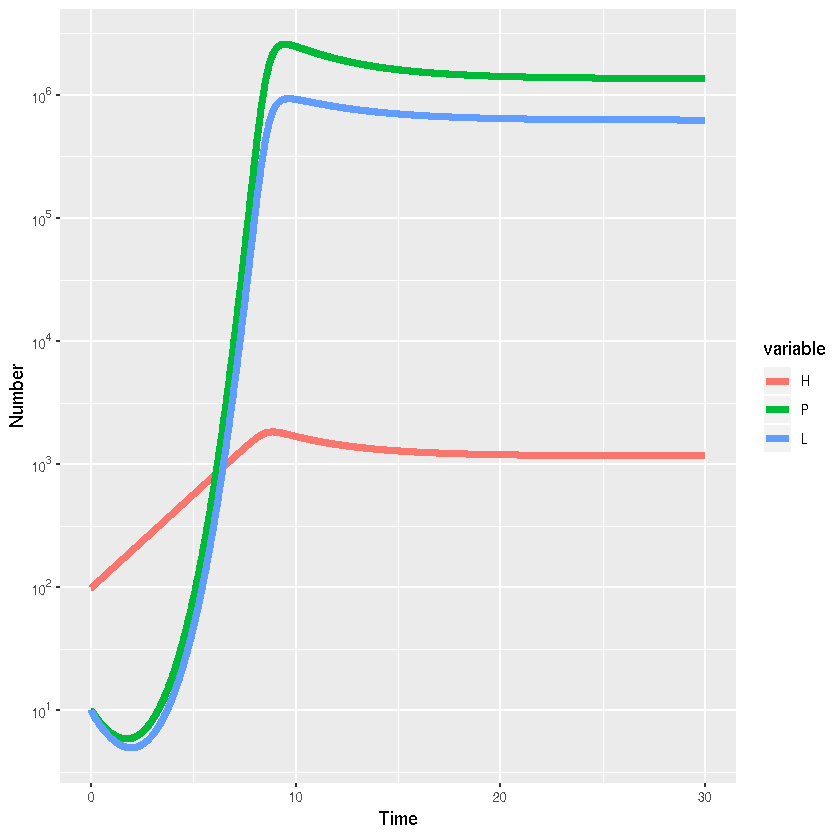

In [3]:
HPL_out_long <- melt(as.data.frame(HPL_out),"time")

#Visualisation
library(ggplot2)

ggplot(HPL_out_long,aes(x=time,y=value,colour=variable,group=variable))+
  # Add line
  geom_line(lwd=2)+
  #Add labels
  xlab("Time")+ylab("Number")+scale_y_log10(breaks = trans_breaks("log10", function(x) 10^x),
              labels = trans_format("log10", math_format(10^.x)))
